# Classification of pikachu vs pichu

## reading the datafiles, 
- pikachu.txt
- pichu.txt
- test.txt
and plotting the data points in a scatterplot

[[25.0, 15.0, 26.0, 22.0], [35.0, 14.0, 30.0, 45.0]]

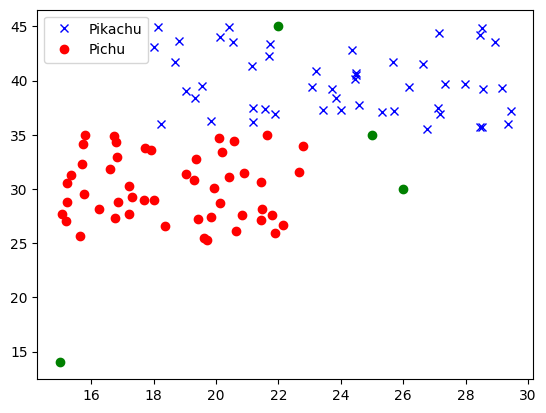

In [2]:
import matplotlib.pyplot as plt
import re

def ReadData(filename):
    file1 = open(filename, 'r')
    count = 0

    x_values = []
    y_values = []
    # header in pikachu and Pichu datafiles
    head=r'\(\s*width\s*\(\s*cm\s*\),\s*height\s*\(\s*cm\s*\)\)'
    # skip the header
    line = file1.readline()
    if re.match(head,line):
        while True:
            count += 1
        
            # Get next line from file
            line = file1.readline()
            
            # if line is empty
            # end of file is reached
            if not line:
                break
            values = line.strip('()\n').split(', ')
            x_values.append(float(values[0]))
            y_values.append(float(values[1]))
            # print("Line{}: {}".format(count, line.strip()))
        file1.close()
    else:
        while True:
            values = line.split("),")
            for tpair in values:
                myval=tpair.strip('\(\)').strip()
                # need to strip some (
                xyval=myval.strip('\()').split(',')
                # print(f"{xyval}") = [x1, y1], [x2, y2]
                x_values.append(float(xyval[0]))
                y_values.append(float(xyval[1]))
            line=file1.readline()
            if not line:
                break

        file1.close()
    return [x_values,y_values]




vect1=ReadData('Pikachu.txt')
vect2=ReadData('Pichu.txt')
vect3=ReadData('test_points.txt')
plt.figure()
plt.plot(vect1[0],vect1[1],'bx', label='Pikachu')
plt.plot(vect2[0],vect2[1], 'ro', label='Pichu')
plt.plot(vect3[0],vect3[1], 'go', label='Test')
plt.legend(("Pikachu", "Pichu"))

vect3


## Euclidian distance 
Th euclidian is calculated between the testpoints and respective category.
The resulting vectors are then sorted.

In [112]:
# Function calculating the Euclidean distance

def euclidian(x1, y1, x2, y2):
    return ((x1-x2)**2 +(y1-y2)**2)**0.5

# Calculating distance beween traget vector (points to classify) and source 
# vector (data points for the known classes)

def CalcDist(targetvect, sourcevect):
    resultv=[]
    sortedresults=[]
    for i,x in enumerate(targetvect[0]):
        resultv.append([])
        sortedresults.append([])
        for j,y in enumerate(sourcevect[0]):
            resultv[i].append(euclidian(targetvect[0][i],targetvect[1][i],sourcevect[0][j],sourcevect[1][j]))
        sortedresults[i]=sorted(resultv[i])
    return sortedresults

# Obtain the sorted Euclidean distances form the known classes

sortedPikachu= CalcDist(vect3,vect1)
sortedPichu= CalcDist(vect3,vect2)




## Comparing the smallest distance to testpoints and predict outcome


In [4]:
def Classify(invect):
    for i,x in enumerate(invect[0]):
        if sortedPikachu[i][0] < sortedPichu[i][0]:
            print(f"Sample with (width, height): ({invect[0][i]},{invect[1][i]}) classified as Pikachu")
        elif sortedPikachu[i][0] > sortedPichu[i][0]:
            print(f"Sample with (width, height): ({invect[0][i]},{invect[1][i]}) classified as Pichu")
        else:
            print(f"Sample with (width, height): ({invect[0][i]},{invect[1][i]}) is indeterminate")

# Classify the test data

Classify(vect3)


Sample with (width, height): (25.0,35.0) classified as Pikachu
Sample with (width, height): (15.0,14.0) classified as Pichu
Sample with (width, height): (26.0,30.0) classified as Pichu
Sample with (width, height): (22.0,45.0) classified as Pikachu


## Assignments
Låt användaren mata in en godtycklig punkt och avgör om det är en Pikachu 
eller Pichu.

Sample with (width, height): (12,18) classified as Pichu


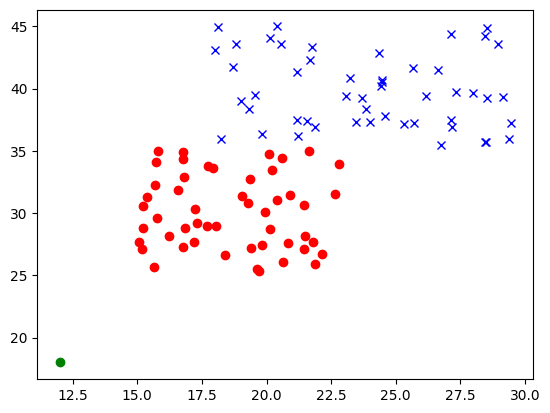

In [103]:
from numbers import Number

def Readcoordinate(coord):
    while True:
        try:
            intTarget = int(input(f"Your {coord} coordinate (must be an int >=0?"))
        except ValueError:
            continue
        else:
            if intTarget < 1:
                continue
            else:
                return (intTarget)
            

def Onepointdist(x,y, sourcevect):
    resv=[]
    for j,y in enumerate(sourcevect[0]):  
        resv.append([])
        resv[j].append(euclidian(x,y,sourcevect[0][j],sourcevect[1][j]))
    return sorted(resv)



xcoord=Readcoordinate("X")
ycoord=Readcoordinate("Y")


pikachusort=Onepointdist(xcoord, ycoord, vect1)
pichusort=Onepointdist(xcoord, ycoord, vect2)

if pikachusort[0]< pichusort[0]:
    print(f"Sample with (width, height): ({xcoord},{ycoord}) classified as Pikachu")
elif pikachusort[0] > pichusort[0]:
    print(f"Sample with (width, height): ({xcoord},{ycoord}) classified as Pichu")
else:
    print(f"Sample with (width, height): ({xcoord},{ycoord}) is indeterminate")




plt.plot(vect1[0],vect1[1],'bx', label='Pikachu')
plt.plot(vect2[0],vect2[1], 'ro', label='Pichu')
plt.plot(xcoord,ycoord, 'go', label='Test')
# plt.legend("Pikachu", "Pichu")

## uppgift 2
Nu ska du istället välja de fem närmaste punkterna till din testpunkt. Den klass
testpunkten tillhör avgörs av majoritetsklassen av de närmaste punkterna.

- först testast denna appoach på de testpounkter som var givna i uppgiften

In [128]:

# since we already have the distances between all pichu/pikachu points and testpoints
# just shorten the list to 5 points in the sorted distance list for each class (five is 
# the maximal number if all comes from one of the classes)


def typ5dist(target, source, id):
    top5res=[]
    for i,x in enumerate(target[0]):
        top5res.append([])
        makemyres=source[i][:5]
        for z in makemyres:
            top5res[i].append([i, z, id])
    return top5res

# obtain the top 5 from each of the testpoints for Pikachu and Pichu
# sortedPikachu and sordedPichu contains a list of list, a list for the 
# given testpoint distances in a list of all the testpoints


pikachu5top=typ5dist(vect3, sortedPikachu, 1)
pichu5top=typ5dist(vect3, sortedPichu, 2)

# function to join the top 5 lists for the testpoint list from each class (Pikatchu and Pichu), 
# That is, if we merge the to category lists we can use the traditional sort to count the 
# occurence of each category in the top 5.

def joinmerge (test, pikachu5sort, pichu5sort):
    major=[]
    for z,b in enumerate(test[0]):
        major.append(pikachu5sort[z]+pichu5sort[z])
    return major


def sub_points_category(out):
    sorted_list=[]
    for j,x in enumerate(out):
        tmp=out[j]
        sorted_list.append(sorted(tmp, key=lambda x: x[1]))
    return sorted_list

def judge(out_list, test): # test is the target vector, to enable printouts
    for j,x in enumerate(out_list):
        # print(f" {out_list[j]}") 
        count_pichu=0
        count_pikacchu=0
        measure=out_list[j][:5]
        for i,z in enumerate(measure):
            if out_list[j][i][2]==1:
                count_pikacchu +=1
            else:
                count_pichu +=1
        if (count_pikacchu > count_pichu):
            print(f"Sample with (width, height): ({test[0][j]},{test[1][j]}) classified as Pikachu favour {count_pikacchu} to {count_pichu}")
        elif (count_pikacchu < count_pichu):
            print(f"Sample with (width, height): ({test[0][j]},{test[1][j]}) classified as Pichu favour {count_pichu} to {count_pikacchu}")
        else:
             print(f"Sample with (width, height): ({test[0][j]},{test[1][j]}) is indeterminate") # this cannot happen but kept in case of futher development


judge(sub_points_category(joinmerge(vect3,pikachu5top,pichu5top)), vect3)



Sample with (width, height): (25.0,35.0) classified as Pikachu favour 4 to 1
Sample with (width, height): (15.0,14.0) classified as Pichu favour 5 to 0
Sample with (width, height): (26.0,30.0) classified as Pichu favour 5 to 0
Sample with (width, height): (22.0,45.0) classified as Pikachu favour 5 to 0


Sample with (width, height): (21,35) classified as Pichu favour 3 to 2


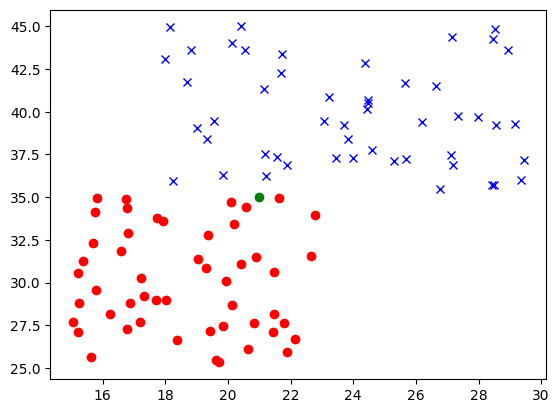

In [131]:
x5coord=Readcoordinate("X")
y5coord=Readcoordinate("Y")

target=[[x5coord],[y5coord]]

pikachus= CalcDist(target,vect1) # calculate distances to Pikachu
pichus =CalcDist(target,vect2) # calculate distances to pichu

top5pika=typ5dist(target, pikachus, 1)
top5pich=typ5dist(target, pichus, 2)


judge(sub_points_category(joinmerge(target,top5pika,top5pich)),target)

plt.plot(vect1[0],vect1[1],'bx', label='Pikachu')
plt.plot(vect2[0],vect2[1], 'ro', label='Pichu')
plt.plot(x5coord,y5coord, 'go', label='Test')